#### 1. Import Libraries and Create a Synthetic Dataset:

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Create a date range
dates = pd.date_range(start='2021-01-01', periods=100, freq='D')

# Generate synthetic sales data
np.random.seed(42)
sales = np.random.poisson(lam=20, size=len(dates))

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
    'Promotion': np.random.choice([0, 1], size=len(dates), p=[0.7, 0.3]),  # 30% chance of promotion
    'Holiday': np.where(dates.isin(pd.to_datetime(['2021-01-01', '2021-01-20'])), 1, 0)  # Set specified dates as holidays
})

# Set the date as index
data.set_index('Date', inplace=True)
data.to_csv("test.csv")
print(data)


            Sales  Promotion  Holiday
Date                                 
2021-01-01     23          1        1
2021-01-02     15          1        0
2021-01-03     21          0        0
2021-01-04     25          1        0
2021-01-05     15          0        0
...           ...        ...      ...
2021-04-06     25          0        0
2021-04-07     15          0        0
2021-04-08     29          0        0
2021-04-09     21          0        0
2021-04-10     14          0        0

[100 rows x 3 columns]


#### 2. Feature Engineering: Adding lag variables to represent previous sales as features for the model.

In [23]:
# Create lagged features (Sales from previous 1 and 2 days)
data['Sales_Lag1'] = data['Sales'].shift(1)
data['Sales_Lag2'] = data['Sales'].shift(2)

# Drop missing values created by lagging
data.dropna(inplace=True)
data.to_csv("lagVariables.csv")

#### 3. Prepare Data for Modeling: Splitting data into training and test sets and Train a Linear Regression Model:

In [24]:
# Define features and target variable
X = data[['Sales_Lag1', 'Sales_Lag2', 'Promotion', 'Holiday']]  # Features
y = data['Sales']  # Target variable (Sales)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

#### 4. Make Predictions and Evaluate the Model: Evaluating model performance using metrics like mean squared error (MSE) and R-squared (R²) for accuracy

In [25]:
# Predict the sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 22.6659053421888
R-squared: 0.0027101378423144418


#### 5. Visualize Predictions vs. Actual Sales:

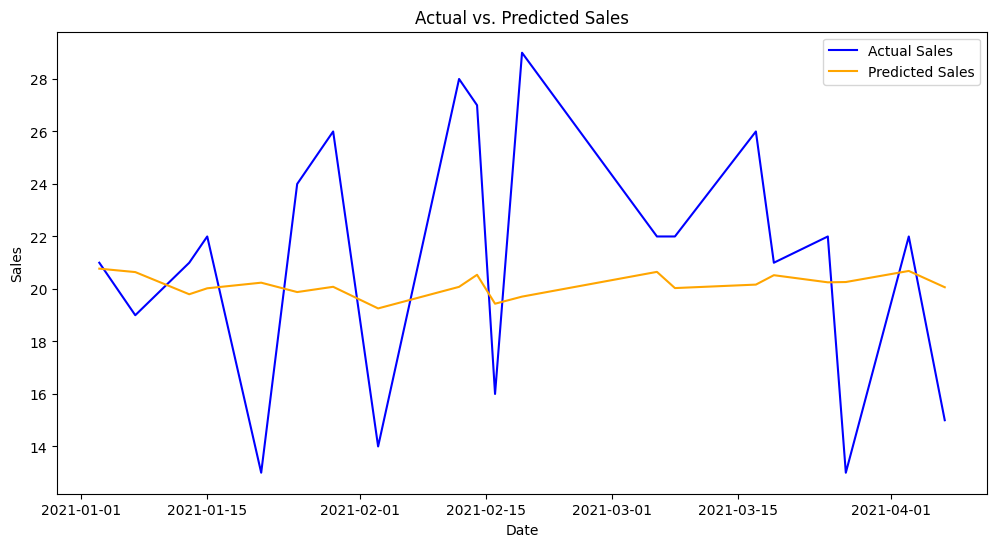

In [26]:
# y_test is sorted and free of NaN values
y_test = y_test.sort_index().dropna()

# Convert y_pred (if it's a numpy array) into a pandas Series with the same index as y_test
y_pred = pd.Series(y_pred, index=y_test.index)

# Plot the actual vs predicted sales again
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='orange')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

